# CHM210 Assignment 1: Stratospheric Chemistry

Welcome to the first assignment for CHM210. We are going to use a <a href="https://jupyter4edu.github.io/jupyter-edu-book/">Jupyter notebook</a> with Python to investigate some properties of stratospheric chemistry and the ozone layer. There are a lot of free, online resources out there to help you with Jupyter and Python. I recommend Christian Hill's <a href="https://scipython.com/book/">"Learning Scientific Programming with Python"</a>. The chemistry content of this assignment should follow your textbook and lecture notes, but for those wanting additional materials, Daniel Jacob's <a href="http://acmg.seas.harvard.edu/people/faculty/djj/book/">"Introduction to Atmospheric Chemistry"</a> is freely available online and has several relevent chapters for this assignment (Ch1. <a href="http://acmg.seas.harvard.edu/people/faculty/djj/book/bookchap1.html#pgfId=518053">"Measures of Atmospheric Composition</a>, Ch2. <a href="http://acmg.seas.harvard.edu/people/faculty/djj/book/bookchap2.html#pgfId=496461">"Atmospheric Pressure"</a>,  and Ch10. <a href="http://acmg.seas.harvard.edu/people/faculty/djj/book/bookchap10.html#pgfId=46289">"Stratospheric Ozone"</a>).

We are going to looking at some real satellite data relevant to the structure and composition of the stratosphere in order to better understand the chemistry that takes place. The below image is data from the Atmospheric Infrared Sounder, or AIRS, instrument from NASA's Earth Observing System (EOS) polar-orbiting platform. This data is freely available through NASA's EarthData portal, <a href="https://giovanni.gsfc.nasa.gov/giovanni/">GIOVANNI</a>. 
<img src="http://individual.utoronto.ca/sck/CHM210/GIOVANNI-output8IOXbvLT.png">
The above data is a daily averaged vertical profile of ozone over Toronto from September 23rd, 2016. We can see where the ozone "layer" is on this graph. But <i>why</i> does it form there?

First things first, we need to import the Python modules we will be using for this assignment. Press the "Run" button (or ctrl-enter) on the box below to import the packages we need. If done successfully, the "You have imported the above packages!" text will display below. 

## Importing Python modules

In [168]:
import matplotlib.pyplot as plt
import math as m
import numpy as np
import os
import numpy as np
print("You have imported the above packages!")

You have imported the above packages!


## Let's load some real data

Let's start by looking at the observed temperature profile.

First, we need to download the data into our notebook. We will do so with the loadtxt function as below. Run the code below this text box. When you run the code, the text stating "You have loaded the pressure and temperature data!" will print.

In [170]:
# download .txt containing atmospheric pressure in units of hPa
Pressure = np.loadtxt(fname = "http://individual.utoronto.ca/sck/CHM210/Pressure.txt")
# download .txt containing atmospheric temperature in units of Kelvin
Temperature = np.loadtxt(fname = "http://individual.utoronto.ca/sck/CHM210/Temperature.txt")
print("You have loaded the pressure and temperature data!")

You have loaded the pressure and temperature data!


## Learning to plot simple data
Now, let's plot the data to see what it looks like. The code below will create a simple plot of the data we have just imported. If the below code works properly, you should see a plot with pressure on the y-axis and temperature on the x-axis.

(210, 320)

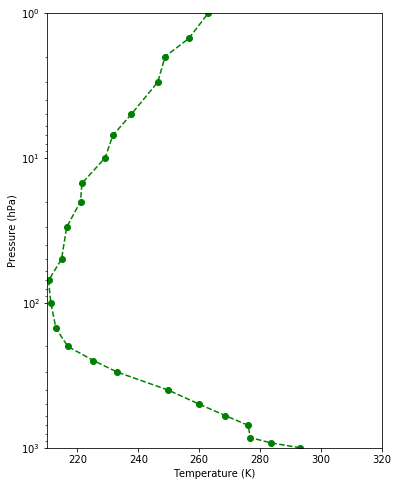

In [176]:
#This makes the plot (and sets the size as 6x8")
fig = plt.figure(figsize=(6, 8))
tp = fig.add_subplot(111)

#This tells Python what data to plot (Temperature vs Pressure) and what markers to use (go-- means green dashes between solid circles)
tp.plot(Temperature, Pressure, 'go--')
#We label the axis (with units!)
tp.set_ylabel('Pressure (hPa)')
tp.set_xlabel('Temperature (K)')
#We will set the y-axis to be on a log-scale since we are plotting pressure
tp.set_yscale('log')
#We will set the axis limits just to make things look a little nicer
tp.set_ylim((1000, 1))
tp.set_xlim((210, 320))

# Q1a. Identify the height at which the tropopause occurs (in units of km)

To do this, we will need to convert hPa to km. We can do that by knowing that,

\begin{align}
z = \frac{P(z)}{P(0)}\times \frac{(R\times T)}{(M_{air}\times g)}
\end{align}

Where $P(z)$ is the pressure at altitude z, $P(0)$ is the pressure at the surface, $R$ is the gas constant, $T$ is the temperature, $M_{air}$ is the molecular weight of air, and $g$ is the acceleration due to gravity. We can write this equation in Python as below:

In [175]:
# First, let us assign values to the variables we need to use. 
# When working with R, the gas constant, pay close attention to its units.
R = 8.31 # m3⋅Pa⋅K−1⋅mol−1
Ma = 29 #g mol-1.
g = 9.8 #m s-2

# This will create an empty list (the same length as our Pressure list) to hold our calculated altitude values
Altitude = [None]*len(Pressure)

# We are going to calculate the altitude corresponding to each pressure value.
# We are going to do this with a "for loop". 
# What this says is that for each level z, starting with the first pressure value (0) and ending with the last (len(Pressure)), we will calculate the corresponding altitude
for z in range(0,len(Pressure)):
    Altitude[z] = -m.log(Pressure[z]/Pressure[0])*(R*Temperature[z])/(Ma*g)

print(Altitude)

[-0.0, 0.6463918956236044, 1.3151452214061055, 2.8796906991746334, 4.011800255564502, 5.269155486326363, 6.693743805188915, 8.202566021890949, 9.130065147624338, 10.205141142150634, 11.811757392142377, 14.222340082851833, 16.3668965290799, 18.811912030935336, 22.19466832623713, 25.281169035889185, 27.193723822474034, 30.84685886963993, 33.60417303182404, 36.82317752744588, 41.8523161562467, 45.20630417570779, 48.78358518373318, 53.12719258775497]


If the above code worked, you should have printed the altitudes calculated ranging from 0km to 53km. Let's replot our temperature vs pressure graph to show temperature vs altitude.

Text(0.5, 0, 'Temperature (K)')

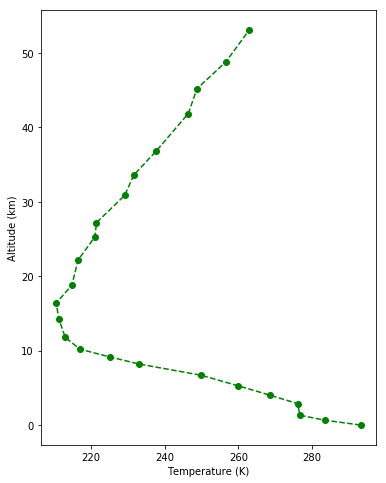

In [177]:
fig = plt.figure(figsize=(6, 8))
tp = fig.add_subplot(111)

tp.plot(Temperature, Altitude, 'go--')
tp.set_ylabel('Altitude (km)')
tp.set_xlabel('Temperature (K)')

Now you should be able to identify the height at which the tropopause occurs!

# Answer to Q1a:

[type your answer here]

# Q1b: Is this height constant (ie. would we expect to find the tropopause at the same altitude over different parts of the world or times of year)? Why or why not?

# Answer to Q1b:

[type your answer here]

# Q2a. Plot Altitude vs Number Density
All axis must be labelled with correct units.

To do this, you will need to remember the ideal gas law,
\begin{align}
PV=nRT
\end{align}
Where $P$, $R$, $T$ are as defined above, and #n# is the number of moles of air contained in $V$ volume of atmosphere. You will likely need Avogadro's number to convert between molecules and moles.

In [179]:
Av = 6.023e23 # molecules mol-1 is Avogadro's number

Remember to pay close attention to units!

In [178]:
Na = [(Av*100*Pressure[z])/(R*Temperature[z]) for z in range(0,len(Pressure))]

Once you've calculated number density, create your plot.

# Answer to Q2a:

Text(0.5, 0, 'Number Density (molecules/$m^3$)')

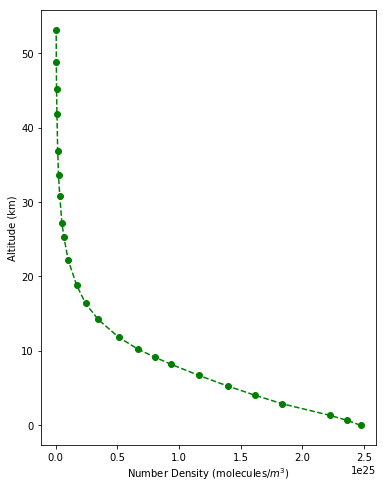

In [180]:
fig3 = plt.figure(figsize=(6, 8))
na = fig3.add_subplot(111)

na.plot(Na, Altitude, 'go--')
na.set_ylabel('Altitude (km)')
na.set_xlabel('Number Density (molecules/$m^3$)')

# Q2b. Plot Altitude vs $O_2$
All axis must be labelled with correct units.

# Answer to Q2b:

Text(0.5, 0, '[$O_2$] (molecules/$cm^3$)')

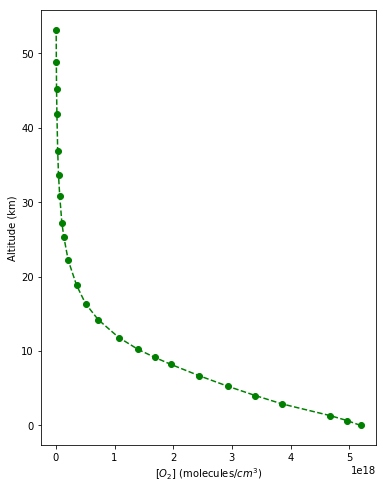

In [185]:
#convert Na in molecules/m^3 to molecules/cm^3
Na = [(Av*100*Pressure[z])/(R*Temperature[z])/(100**3) for z in range(0,len(Pressure))]
O2 = [0.21*Na[z] for z in range(0,len(Altitude))]
N2 = [0.78*Na[z] for z in range(0,len(Altitude))]

fig4 = plt.figure(figsize=(6, 8))
O2a = fig4.add_subplot(111)
O2a.plot(O2, Altitude, 'go--')
O2a.set_ylabel('Altitude (km)')
O2a.set_xlabel('[$O_2$] (molecules/$cm^3$)')

# The Chapman Mechanism 

Recall from lecture the four reactions originally proposed to explain the presence of the stratospheric ozone layer,

\begin{align}
O_{2} + h\nu & \rightarrow O + O^{*} & (\lambda<240nm) &&(R1) \\
O + O_{2} + M & \rightarrow O_{3} + M &  &&(R2) \\
O_{3} + h\nu&  \rightarrow O_{2} + O^{*} & (\lambda<320nm) &&(R3) \\
O_{3} + O& \rightarrow 2O_{2} &  &&(R4)
\end{align}

# Q3a. Write down the rates of each of the above four reactions and identify what units the rate constants must have.

# Answer to Q3a:

\begin{align}
rate_{1} &= k_{1}[O_{2}] \\
rate_{2} &= k_{2}[O][O_{2}][M]  \\
rate_{3} &= k_{3}[O_{3}] \\
rate_{4} &= k_{4}[O_{3}][O] 
\end{align}

$k_{1}$ and $k_{3}$ have units of $s^{-1}$ (photon density is already incorporated), $k_{2}$ in units of $cm^{6}molecules^{-2}s^{-1}$, and $k_{4}$ in units of $cm^{3}molecules^{-1}s^{-1}$.

# Q3b. Plot the rate constants vs altitude
To do this, we will need to import data for k1 and k3. The data we will be using is output from the <a href="http://cprm.acom.ucar.edu/Models/TUV/Interactive_TUV/">TUV calculator</a>, a free, online tool for modelling photolysis frequencies and actinic flux.

In [186]:
# download .txt containing Photolysis rate constants for O2 -> O + O from 0 - 50km~
k1 = np.loadtxt(fname = "http://individual.utoronto.ca/sck/CHM210/k1d.txt")
# download .txt containing Photolysis rate constants for O3 -> O2 + O(1D) from 0 - 50km~
k3 = np.loadtxt(fname = "http://individual.utoronto.ca/sck/CHM210/k3d.txt")
print("k1 and k3 have been loaded!")

k1 and k3 have been loaded!


The expression for $k_2$ is given by,

$k_{2} = 6\times10^{-34}(T/300)^{-2.3}$ 

You will need to write this in a form Python can interpret.

In [15]:
k2 = [6e-34*(Temperature[z]/300)**-2.3 for z in range(0,len(Pressure))]

Similarly, $k_{4}$ is given by,

$k_{4} = 8\times10^{-12}exp(-2060/T)$ 

In [16]:
k4 = [8e-12*m.exp(-2060/Temperature[z]) for z in range(0,len(Pressure))]

Now we should have everything needed to plot the four rate constants.

# Answer to Q3b:

(0, 7.444429003391403e-15)

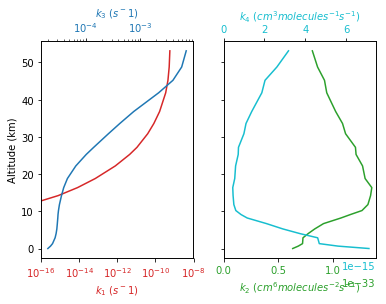

In [68]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
color = 'tab:red'
ax1.set_xlabel('$k_1$ ($s^-1$)', color=color)
ax1.set_xscale('log')
ax1.set_ylabel('Altitude (km)')
ax1.plot(k1, Altitude, color=color)
ax1.tick_params(axis='x', labelcolor=color)
ax1.set_xlim((1e-16, None))

ax3 = ax1.twiny()  # instantiate a second axes that shares the same y-axis
color = 'tab:blue'
ax3.set_xlabel('$k_3$ ($s^-1$)', color=color)  # we already handled the y-label with ax1
ax3.set_xscale('log')
ax3.plot(k3, Altitude, color=color)
ax3.tick_params(axis='x', labelcolor=color)

color = 'tab:green'
ax2.set_xlabel('$k_2$ ($cm^{6}molecules^{-2}s^{-1}$)', color=color)
ax2.plot(k2, Altitude, color=color)
ax2.tick_params(axis='x', labelcolor=color)
ax2.set_xlim((0, None))

ax4 = ax2.twiny()  # instantiate a second axes that shares the same y-axis
color = 'tab:cyan'
ax4.set_xlabel('$k_4$ ($cm^{3}molecules^{-1}s^{-1}$)', color=color)  # we already handled the y-label with ax1
ax4.plot(k4, Altitude, color=color)
ax4.tick_params(axis='x', labelcolor=color)
ax4.set_xlim((0, None))

# Q3c. Write an expression for the steady-state concentration of $O_3$

# Answer to Q3c:

Rate of change in $[O]$ can be written as,

\begin{align}
\frac{d[O]}{dt} & = 2\times rate_{1} - rate_{2} + rate_{3} - rate_{4} \\
 & =2k_{1}[O_{2}]  - k_{2}[O][O_{2}][M] + k_{3}[O_{3}] - k_{4}[O_{3}][O]
\end{align}

If we assume the concentration of oxygen atoms is in a steady-state, then that means, $\frac{d[O]}{dt} = 0$

So,
\begin{align}
0=2k_{1}[O_{2}]  - k_{2}[O][O_{2}][M] + k_{3}[O_{3}] - k_{4}[O_{3}][O]
\end{align}


# Q3d. Plot the the steady-state concentration of $O_3$ vs altitude

# Answer to Q3d:

Text(0.5, 0, '[$O_3$] (molecules/$cm^3$)')

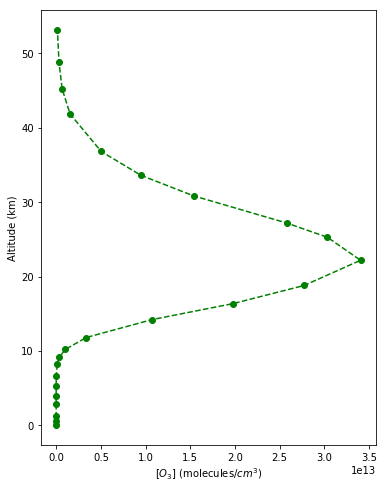

In [188]:
O3 = [((k1[z]*k2[z]*(O2[z]**2)*Na[z])/(k3[z]*k4[z]))**.5 for z in range(0,len(Pressure))]

fig5 = plt.figure(figsize=(6, 8))
O3a = fig5.add_subplot(111)

O3a.plot(O3, Altitude, 'go--')
O3a.set_ylabel('Altitude (km)')
O3a.set_xlabel('[$O_3$] (molecules/$cm^3$)')

# Q3e. Determine the overhead ozone column depth in Dobson units (DU)

# Answer to Q3e:

In [189]:
#Convert to Dobson Units
O3dob = [O3[z]*1e5/2.69e16 for z in range(0,len(Pressure))]

In [190]:
print(sum(O3dob))

690.7739107795043


# Q3f. Plot our steady-state $[O_3]$ vs altitude on the same graph as the satellite observations above in units of ppbv. 
We need to convert our data from molecules/cm^3 to ppbv. To do this, we will need to use the ideal gas law. We will also have to download the ozone observations in a form we can easily use:

In [192]:
# download .txt containing [O3] observations from 0 - 50km~
O3obs = np.loadtxt(fname = "http://individual.utoronto.ca/sck/CHM210/O3.txt")

In [104]:
R = 82.057338 # cm3 atm K=1 mol=1
#O3ppbv = [(O3[z]*R*Temperature[z]/Av)/(Pressure[z]*9.869e-4)*1e9 for z in range(0,len(Altitude))]
O3ppbv = [O3[z]/(Na[z]/(100**3))*1e9 for z in range(0,len(Pressure))]

# Answer to Q3f:

(1000, 1)

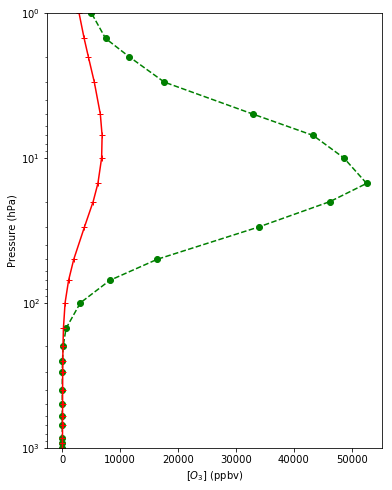

In [105]:
fig5 = plt.figure(figsize=(6, 8))
O3p = fig5.add_subplot(111)

O3p.plot(O3ppbv, Pressure, 'go--')
O3p.plot(O3obs, Pressure, 'r+-')
O3p.set_ylabel('Pressure (hPa)')
O3p.set_xlabel('[$O_3$] (ppbv)')
O3p.set_yscale('log')
O3p.set_ylim((1000, 1))

# Q3g. Why might modelled ozone be so much greater than the observed ozone concentrations?

# Answer to Q3g:


In [98]:
Q4a. Why might modelled ozone be so much greater than the observed ozone concentrations?

690.7739107795043


\begin{align}
H_{2}O + O^{*} & \rightarrow 2OH & , &(R5) \\
OH + O_{3} & \rightarrow HO_{2} + O_{2} & , &(R6) \\
HO_{2} + O_{3} &  \rightarrow OH + 2O_{2} & , &(R7) \\
OH + HO_{2} & \rightarrow H_{2}O + O_{2} & , &(R8)
\end{align}

Thinking about the most relevant reactions for $O^{*}$ based on atmospheric abundance,
\begin{align}
O_{2} + h\nu & \rightarrow O + O^{*} & (\lambda<240nm), &(R1) \\
M + O^{*} & \rightarrow M + O & , &(Rx) \\
H_{2}O + O^{*} & \rightarrow 2OH & , &(R5) 
\end{align}

In [120]:
# download .txt containing [H2O] observations from 0 - 50km~
H2Oobs = np.loadtxt(fname = "http://individual.utoronto.ca/sck/CHM210/water.txt")

(1000, 1)

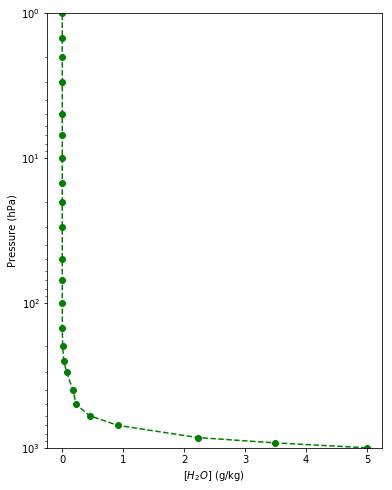

In [123]:
fig5 = plt.figure(figsize=(6, 8))
H2Op = fig5.add_subplot(111)

H2Op.plot(H2Oobs, Pressure, 'go--')
H2Op.set_ylabel('Pressure (hPa)')
H2Op.set_xlabel('[$H_{2}O$] (g/kg)')
H2Op.set_yscale('log')
H2Op.set_ylim((1000, 1))

(1000, 1)

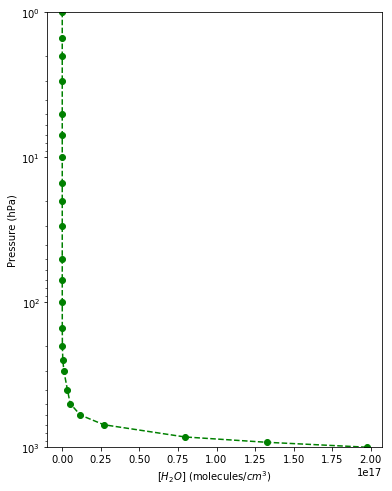

In [158]:
MH2O = 18 # g/mol
R = 8.31447215 # J mol-1 K-1
H2Ovm = [(Ma*H2Oobs[z]*.001/(Ma*H2Oobs[z]*.001+MH2O))*1000 for z in range(0,len(Pressure))]
H2O = [H2Ovm[z]*(Pressure[z]*100/(R*Temperature[z]))*Av*1e-9 for z in range(0,len(Pressure))]

fig5 = plt.figure(figsize=(6, 8))
H2Op = fig5.add_subplot(111)

H2Op.plot(H2O, Pressure, 'go--')
H2Op.set_ylabel('Pressure (hPa)')
H2Op.set_xlabel('[$H_{2}O$] (molecules/$cm^{3}$)')
H2Op.set_yscale('log')
H2Op.set_ylim((1000, 1))

(1000, 1)

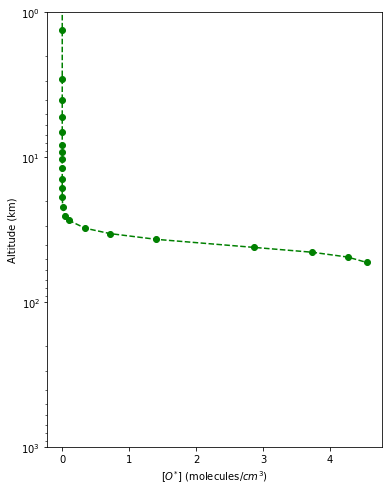

In [167]:
R= 8.314472e-03 # kJ / mole K
k5 = [1.62e-10*(Temperature[z]/298)*m.exp(0.54/(R*Temperature[z])) for z in range(0,len(Pressure))]
k2b = [3.20e-11*(Temperature[z]/298)*m.exp(0.58/(R*Temperature[z])) for z in range(0,len(Pressure))]
k2c = [1.79e-11*(Temperature[z]/298)*m.exp(0.91/(R*Temperature[z])) for z in range(0,len(Pressure))]

O1D = [(k1[z]*O2[z])/(k5[z]*H2O[z]+k2b[z]*O2[z]+k2c[z]*N2[z]) for z in range(0,len(Pressure))]

figO1D = plt.figure(figsize=(6, 8))
O1Da = figO1D.add_subplot(111)

O1Da.plot(O1D, Altitude, 'go--')
O1Da.set_ylabel('Altitude (km)')
O1Da.set_xlabel('[$O^{*}$] (molecules/$cm^{3}$)')
O1Da.set_yscale('log')
O1Da.set_ylim((1000, 1))